In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

ModuleNotFoundError: No module named 'distutils'

In [267]:
pub = pd.read_csv('data/public_data.csv')
submit_pd = pd.read_csv('data/minta_beadando_rand.csv')

In [268]:
pub.head()

,rowID,season,periodID,day_in_period,hour,minute,holyday,weekday,ke,hupx,afrr_fel,afrr_le,mfrr_fel,mfrr_le,afrr,solar_becsult_dayahead,rendszerterheles_terv,target_flag,target_reg
0,0,1,18,0,0,0,False,2,899.343121,287.7194,0.0000,-103.196933,0.0,0.0,-212.845947,0.0,6514.140945,0.0,-100.188708
1,1,1,18,0,0,15,False,2,899.374587,287.7194,55.9286,-5.617200,0.0,0.0,263.427160,0.0,6482.184545,0.0,-100.292441
2,2,1,18,0,0,30,False,2,899.303875,287.7194,69.6826,-9.355800,0.0,0.0,273.927320,0.0,6310.363525,0.0,-100.059327
3,3,1,18,0,0,45,False,2,899.299787,287.7194,30.2718,-16.943567,0.0,0.0,132.621040,0.0,6158.798885,0.0,-100.045850
4,4,1,18,0,1,0,False,2,897.436947,283.6309,25.9714,-12.064167,0.0,0.0,151.888080,0.0,6137.148085,0.0,-104.954619


In [269]:
df = pub.copy()
df.head()

,rowID,season,periodID,day_in_period,hour,minute,holyday,weekday,ke,hupx,afrr_fel,afrr_le,mfrr_fel,mfrr_le,afrr,solar_becsult_dayahead,rendszerterheles_terv,target_flag,target_reg
0,0,1,18,0,0,0,False,2,899.343121,287.7194,0.0000,-103.196933,0.0,0.0,-212.845947,0.0,6514.140945,0.0,-100.188708
1,1,1,18,0,0,15,False,2,899.374587,287.7194,55.9286,-5.617200,0.0,0.0,263.427160,0.0,6482.184545,0.0,-100.292441
2,2,1,18,0,0,30,False,2,899.303875,287.7194,69.6826,-9.355800,0.0,0.0,273.927320,0.0,6310.363525,0.0,-100.059327
3,3,1,18,0,0,45,False,2,899.299787,287.7194,30.2718,-16.943567,0.0,0.0,132.621040,0.0,6158.798885,0.0,-100.045850
4,4,1,18,0,1,0,False,2,897.436947,283.6309,25.9714,-12.064167,0.0,0.0,151.888080,0.0,6137.148085,0.0,-104.954619


In [270]:
pub = pd.read_csv('data/public_data.csv')

def f(x):
    if x == 4:
        return "submit"
    elif x == 3:
        return "test"
    else:
        return "train"
    
df['train_test_validation']=df['day_in_period'].apply(f)

In [271]:
df['periodID'].nunique()

187

In [272]:
input_variables = ['hour', 'minute', 'holyday', 'weekday', 'ke','hupx',	'afrr_fel',	'afrr_le',	'mfrr_fel',	'mfrr_le',	'afrr',	'solar_becsult_dayahead','rendszerterheles_terv']

In [273]:
train_df = df[df['train_test_validation'] == 'train']
test_df = df[df['train_test_validation'] == 'test']
submit_df = df[df['train_test_validation'] == 'submit']

In [274]:
# print(train_df)

In [275]:
# print(test_df)

In [276]:
# print(submit_df)

In [277]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

In [278]:
randF_C = RandomForestClassifier(random_state=42,
                                 n_estimators=33,
                                 max_depth=7)
randF_R = RandomForestRegressor(random_state=42,
                                 n_estimators=33,
                                 max_depth=7)

In [279]:
randF_C.fit(train_df[input_variables],train_df['target_flag'])
randF_R.fit(train_df[input_variables],train_df['target_reg'])

RandomForestRegressor(max_depth=7, n_estimators=33, random_state=42)

In [280]:
test_df=test_df.copy()

In [281]:
test_df

,rowID,season,periodID,day_in_period,hour,minute,holyday,weekday,ke,hupx,afrr_fel,afrr_le,mfrr_fel,mfrr_le,afrr,solar_becsult_dayahead,rendszerterheles_terv,target_flag,target_reg,train_test_validation
288,288,1,18,3,0,0,False,5,818.432049,254.4823,0.0000,-166.681833,0.0,0.0,-277.150007,0.0,6449.113965,1.0,76.721089,test
289,289,1,18,3,0,15,False,5,821.300604,254.4823,3.7986,-25.764100,0.0,0.0,15.072000,0.0,6358.788545,1.0,67.264315,test
290,290,1,18,3,0,30,False,5,821.300418,254.4823,0.0000,-52.983133,0.0,0.0,-159.524560,0.0,6264.255005,1.0,67.264929,test
291,291,1,18,3,0,45,False,5,821.300604,254.4823,0.0000,-115.675467,0.0,0.0,-225.485493,0.0,6148.678605,1.0,67.264315,test
292,292,1,18,3,1,0,False,5,827.623523,251.2670,0.0000,-189.880167,0.0,0.0,-300.647673,0.0,6143.636545,1.0,37.729526,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89659,93164,11,194,3,22,45,False,0,798.111149,245.0325,48.5940,-4.068233,0.0,0.0,255.125000,0.0,5290.121743,1.0,118.173067,test
89660,93165,11,194,3,23,0,False,0,955.757579,242.8421,7.5478,-23.976433,0.0,0.0,34.992160,0.0,5260.683360,0.0,-407.460437,test
89661,93166,11,194,3,23,15,False,0,955.062473,242.8421,70.2754,-0.058900,0.0,0.0,331.860320,0.0,5233.595753,0.0,-405.168878,test
89662,93167,11,194,3,23,30,False,0,798.423227,242.8421,13.5954,-8.259433,0.0,0.0,145.118240,0.0,5208.690177,1.0,111.224239,test


In [282]:
test_df['tipp_C1']=randF_C.predict_proba(test_df[input_variables])[:,1]

In [283]:
test_df['tipp_R1']=randF_R.predict(test_df[input_variables])

<Axes: >

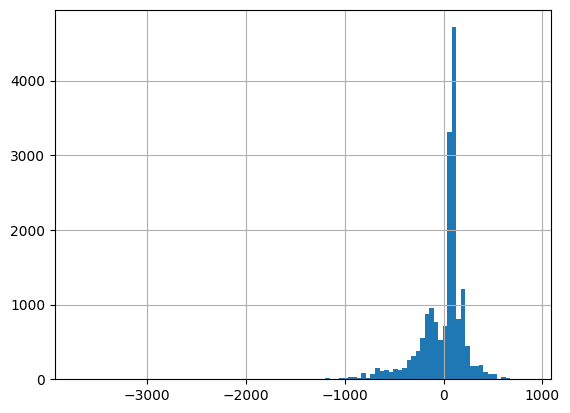

In [284]:
test_df['tipp_R1'].hist(bins=100)

In [285]:
minX = test_df['tipp_R1'].min()

In [286]:
test_df['tipp_R1']=test_df['tipp_R1']-minX
maxX = test_df['tipp_R1'].max()
test_df['tipp_R1']=test_df['tipp_R1']/maxX

In [287]:
test_df['tipp_R1'].describe()

count    17952.000000
mean         0.811308
std          0.056190
min          0.000000
25%          0.788946
50%          0.826236
75%          0.837941
max          1.000000
Name: tipp_R1, dtype: float64

In [288]:
roc_auc_score(test_df['target_flag'],test_df['tipp_C1'])

np.float64(0.9915855990183128)

In [289]:
roc_auc_score(test_df['target_flag'],test_df['tipp_R1'])

np.float64(0.9968400022325179)

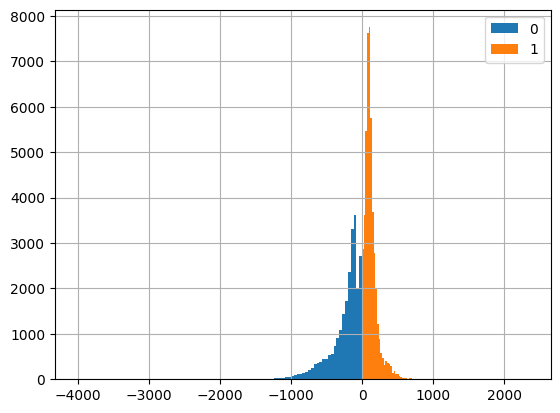

In [290]:
for i in [0,1]:
    cdf = df[df['target_flag']==i]
    cdf['target_reg'].hist(bins=100)
plt.legend(['0','1'])

<Axes: >

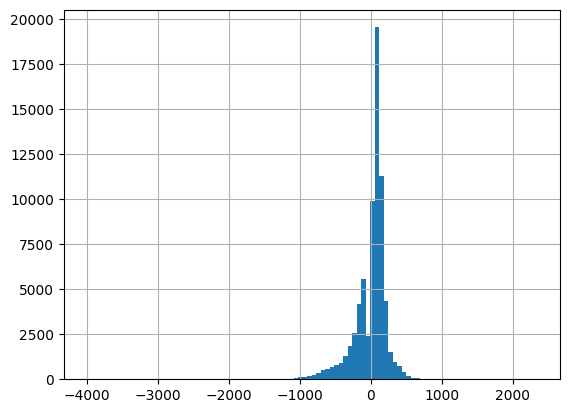

In [291]:
df['target_reg'].hist(bins=100)

In [292]:
submit_df = submit_df.copy()

In [293]:
submit_df['prediction'] = randF_C.predict_proba(submit_df[input_variables])[:, 1]

In [294]:
submit_df=submit_df[['rowID','prediction']]

In [295]:
submit_df.to_csv("beadando1.csv",index=False)